In [22]:
import pandas as pd

file_path = r'C:\Users\User\Desktop\Project 1\nsw_road_crash_data_2018-2022_crash__1_.csv'
df = pd.read_csv(file_path)

df.head()


,Crash ID,Degree of crash,Degree of crash - detailed,Reporting year,Year of crash,Month of crash,Day of week of crash,Two-hour intervals,Street of crash,Street type,...,DCA - description,DCA supplement,First impact type,Key TU type,Other TU type,No. of traffic units involved,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured
0,1151002,Non-casualty (towaway),Non-casualty (towaway),2018,2018,February,Thursday,06:00 - 07:59,SACKVILLE,ST,...,Manov - Reverse in traffic,NaN,Other angle,Car (sedan/hatch),Car (sedan/hatch),3,0,0,0,0
1,1158000,Fatal,Fatal,2018,2018,January,Monday,00:01 - 01:59,BRUNKER,RD,...,On path - Parked,NaN,Other angle,Car (sedan/hatch),Light truck utility(from 2018),2,1,2,0,0
2,1158001,Fatal,Fatal,2018,2018,January,Monday,08:00 - 09:59,CLARENCE,WAY,...,Off left bend into obj,Right,Vehicle - Object,Car (sedan/hatch),NaN,1,1,0,0,0
3,1158002,Fatal,Fatal,2018,2018,January,Monday,02:00 - 03:59,RAILWAY,RD,...,Ped - On carriageway,NaN,Vehicle - Pedestrian,Car (sedan/hatch),Pedestrian,2,1,0,0,0
4,1158515,Fatal,Fatal,2018,2018,January,Tuesday,20:00 - 21:59,CHRISTINA,RD,...,Ped - Far side,NaN,Vehicle - Pedestrian,Car (sedan/hatch),Pedestrian,2,1,0,0,0


In [23]:
day_of_week_counts = df['Day of week of crash'].value_counts()

day_of_week_counts


Day of week of crash
Friday       15226
Thursday     14298
Saturday     14207
Wednesday    13980
Tuesday      13445
Monday       12788
Sunday       11929
Name: count, dtype: int64

In [24]:
weekends = ['Saturday', 'Sunday']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

weekend_crashes = df[df['Day of week of crash'].isin(weekends)]
weekday_crashes = df[df['Day of week of crash'].isin(weekdays)]

normalized_weekend_count = weekend_crashes.shape[0] / 2
normalized_weekday_count = weekday_crashes.shape[0] / 5

normalized_weekend_count, normalized_weekday_count


(13068.0, 13947.4)

In [25]:
weekend_severity_counts = weekend_crashes['Degree of crash'].value_counts() / 2
weekday_severity_counts = weekday_crashes['Degree of crash'].value_counts() / 5

weekend_severity_counts, weekday_severity_counts


(Degree of crash
 Injury                    8476.5
 Non-casualty (towaway)    4356.5
 Fatal                      235.0
 Name: count, dtype: float64,
 Degree of crash
 Injury                    9341.4
 Non-casualty (towaway)    4411.6
 Fatal                      194.4
 Name: count, dtype: float64)

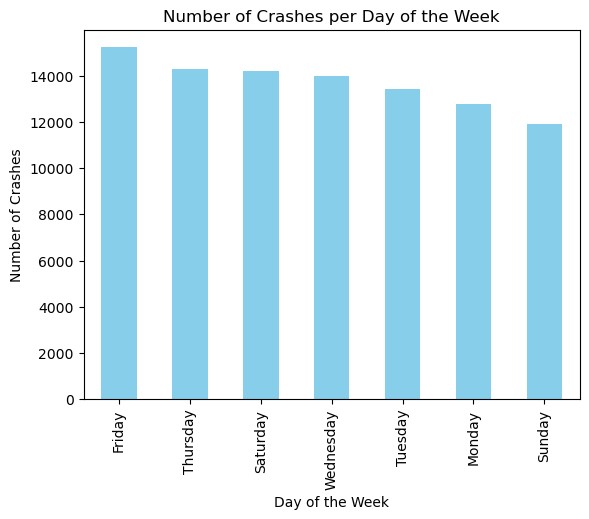

In [26]:
import matplotlib.pyplot as plt

day_of_week_counts.plot(kind='bar', color='skyblue', title='Number of Crashes per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()


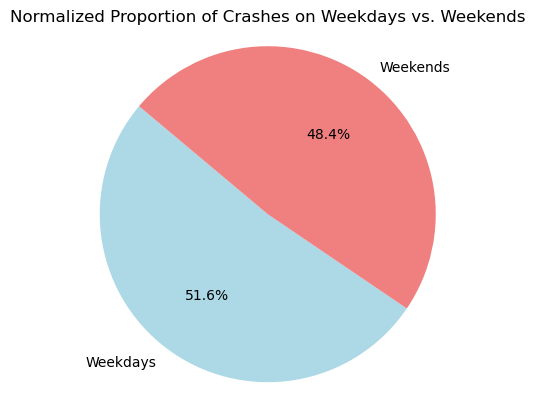

In [27]:
normalized_counts = [normalized_weekday_count, normalized_weekend_count]

labels = ['Weekdays', 'Weekends']
colors = ['lightblue', 'lightcoral']

plt.pie(normalized_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Normalized Proportion of Crashes on Weekdays vs. Weekends')
plt.axis('equal')
plt.show()


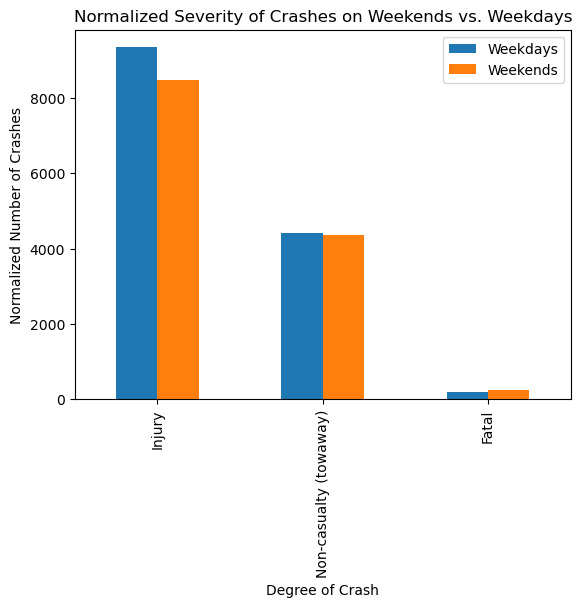

In [29]:
severity_df = pd.DataFrame({
    'Weekdays': weekday_severity_counts,
    'Weekends': weekend_severity_counts
}).fillna(0)

severity_df.plot(kind='bar', title='Normalized Severity of Crashes on Weekends vs. Weekdays')
plt.xlabel('Degree of Crash')
plt.ylabel('Normalized Number of Crashes')
plt.show()
